In [ ]:
!pip install pandas numpy scikit-learn nltk


In [ ]:
import pandas as pd
import re
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

true_data = pd.read_csv('True.csv', low_memory=False)
fake_data = pd.read_csv('Fake.csv', low_memory=False)

# Label the data
true_data['label'] = 1
fake_data['label'] = 0

data = pd.concat([true_data, fake_data], ignore_index=True)

if 'text' not in data.columns:
    raise ValueError("The 'text' column is missing from the dataset")

# Clean text
data['text'] = data['text'].apply(lambda x: re.sub(r'\W', ' ', str(x)))
data['text'] = data['text'].apply(lambda x: x.lower())
data['text'] = data['text'].apply(lambda x: re.sub(r'\s+', ' ', x))

# Remove stopwords
stop_words = stopwords.words('english')
data['text'] = data['text'].apply(lambda x: ' '.join([word for word in x.split() if word not in stop_words]))


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
true_data['label'] = 1
fake_data['label'] = 0

data = pd.concat([true_data, fake_data], ignore_index=True)
if 'text' not in data.columns:
    raise ValueError("The 'text' column is missing from the dataset")

data['text'] = data['text'].apply(lambda x: re.sub(r'\W', ' ', str(x)))  # Remove non-word characters
data['text'] = data['text'].apply(lambda x: x.lower())  # Convert to lowercase
data['text'] = data['text'].apply(lambda x: re.sub(r'\s+', ' ', x))  # Remove extra spaces

stop_words = stopwords.words('english')
data['text'] = data['text'].apply(lambda x: ' '.join([word for word in x.split() if word not in stop_words]))


In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf_vectorizer = TfidfVectorizer(max_features=5000)

X = tfidf_vectorizer.fit_transform(data['text']).toarray()
y = data['label']


In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import MultinomialNB

# Logistic Regression model
log_reg_model = LogisticRegression(max_iter=1000)
log_reg_model.fit(X_train, y_train)

# Random Forest model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Decision Tree model
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)

# Naive Bayes model
nb_model = MultinomialNB()
nb_model.fit(X_train, y_train)


MultinomialNB()

Logistic Regression Accuracy: 98.93%
Random Forest Accuracy: 99.73%
Decision Tree Accuracy: 99.51%
Naive Bayes Accuracy: 93.56%


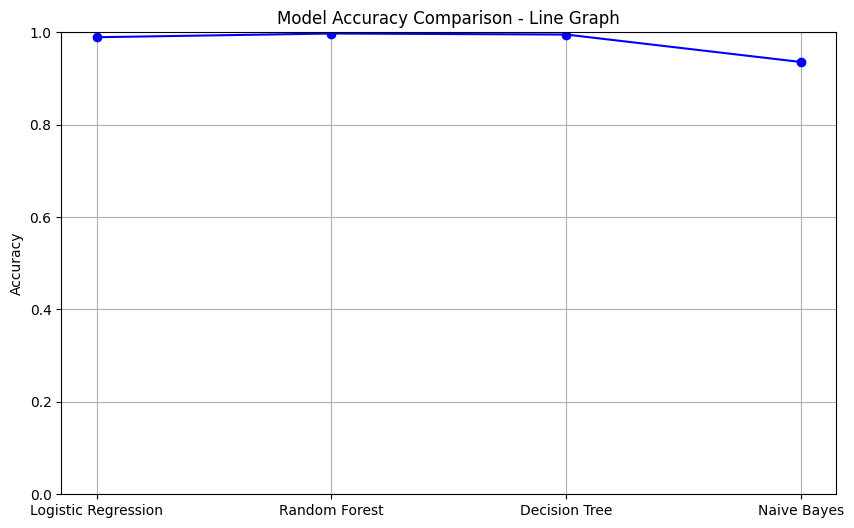

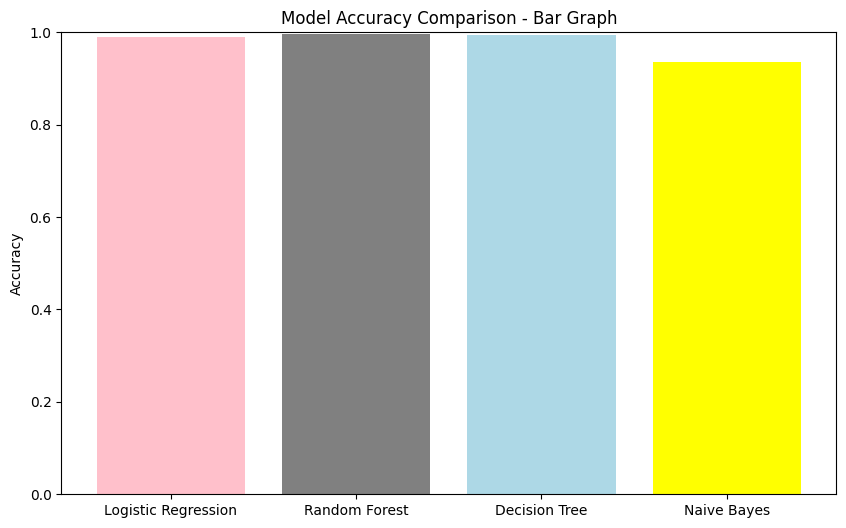

In [ ]:
import matplotlib.pyplot as plt

from sklearn.metrics import accuracy_score

# Make predictions
log_reg_pred = log_reg_model.predict(X_test)
rf_pred = rf_model.predict(X_test)
dt_pred = dt_model.predict(X_test)
nb_pred = nb_model.predict(X_test)

# Evaluate accuracy for each model
log_reg_accuracy = accuracy_score(y_test, log_reg_pred)
rf_accuracy = accuracy_score(y_test, rf_pred)
dt_accuracy = accuracy_score(y_test, dt_pred)
nb_accuracy = accuracy_score(y_test, nb_pred)

# Print accuracy scores
print(f"Logistic Regression Accuracy: {log_reg_accuracy * 100:.2f}%")
print(f"Random Forest Accuracy: {rf_accuracy * 100:.2f}%")
print(f"Decision Tree Accuracy: {dt_accuracy * 100:.2f}%")
print(f"Naive Bayes Accuracy: {nb_accuracy * 100:.2f}%")

# Store accuracies in a dictionary for comparison
model_accuracies = {
    'Logistic Regression': log_reg_accuracy,
    'Random Forest': rf_accuracy,
    'Decision Tree': dt_accuracy,
    'Naive Bayes': nb_accuracy
}

# Line Graph
plt.figure(figsize=(10, 6))
plt.plot(list(model_accuracies.keys()), list(model_accuracies.values()), marker='o', linestyle='-', color='blue')
plt.title("Model Accuracy Comparison - Line Graph")
plt.ylabel("Accuracy")
plt.ylim(0, 1)
plt.grid(True)
plt.show()

# Bar Graph
plt.figure(figsize=(10, 6))
plt.bar(model_accuracies.keys(), model_accuracies.values(), color=['pink', 'grey', 'lightblue', 'yellow'])
plt.title("Model Accuracy Comparison - Bar Graph")
plt.ylabel("Accuracy")
plt.ylim(0, 1)
plt.show()


In [ ]:
best_model = log_reg_model if log_reg_accuracy >= rf_accuracy else rf_model


In [ ]:
# Make predictions using the best model
best_model_pred = best_model.predict(X_test)

# Evaluate accuracy
best_model_accuracy = accuracy_score(y_test, best_model_pred)
print(f"Best Model Accuracy: {best_model_accuracy * 100:.2f}%")


Best Model Accuracy: 99.73%


In [ ]:
# Make predictions using Random Forest (best model)
rf_pred = rf_model.predict(X_test)

# Evaluate accuracy on test data
rf_accuracy = accuracy_score(y_test, rf_pred)
print(f"Random Forest Test Accuracy: {rf_accuracy * 100:.2f}%")


Random Forest Test Accuracy: 99.73%


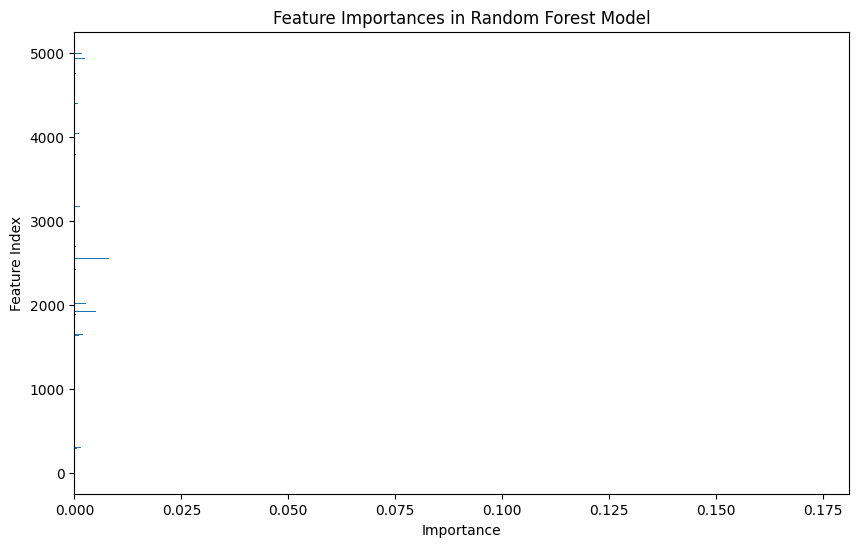

In [ ]:
# Get feature importances from the Random Forest model
importances = rf_model.feature_importances_

# Visualize feature importances
plt.figure(figsize=(10, 6))
plt.barh(range(len(importances)), importances)
plt.title("Feature Importances in Random Forest Model")
plt.xlabel('Importance')
plt.ylabel('Feature Index')
plt.show()


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer

# Preprocessing
vectorizer = TfidfVectorizer(stop_words='english', max_df=0.7)
X = vectorizer.fit_transform(data['text'])
y = data['label']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)


In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(stop_words='english', max_df=0.7)
X = vectorizer.fit_transform(data['text'])
y = data['label']


In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Initialize the Random Forest model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model
rf_model.fit(X_train, y_train)

# Make predictions on the test set
rf_pred = rf_model.predict(X_test)

# Evaluate the accuracy of the model
rf_accuracy = accuracy_score(y_test, rf_pred)
print(f"Random Forest Accuracy: {rf_accuracy * 100:.2f}%")


Random Forest Accuracy: 98.87%


In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.corpus import stopwords
import re

# Load dataset (assuming `data` is a DataFrame with 'text' and 'label')
stop_words = set(stopwords.words('english'))

def clean_text(text):
    text = text.lower()
    text = re.sub(r'\W', ' ', text)
    text = re.sub(r'\s+', ' ', text)
    return ' '.join([word for word in text.split() if word not in stop_words])

data['cleaned_text'] = data['text'].apply(clean_text)

vectorizer = TfidfVectorizer(max_df=0.7)
X = vectorizer.fit_transform(data['cleaned_text'])
y = data['label']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

model = RandomForestClassifier()
model.fit(X_train, y_train)


RandomForestClassifier()

In [ ]:
import pandas as pd
import nltk
from nltk.corpus import stopwords
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split

# Step 1: Load and prepare CSV data
real_news = pd.read_csv('/content/True.csv')
fake_news = pd.read_csv('/content/Fake.csv')

real_news['label'] = 1  # REAL
fake_news['label'] = 0  # FAKE

data = pd.concat([real_news, fake_news])
data = data[['text', 'label']].dropna()

# Step 2: Preprocess and vectorize
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))

vectorizer = TfidfVectorizer(stop_words='english', max_df=0.7)
X = vectorizer.fit_transform(data['text'])
y = data['label']

# Step 3: Train Random Forest
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)
rf_model = RandomForestClassifier()
rf_model.fit(X_train, y_train)


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


RandomForestClassifier()

In [ ]:
import requests
import re

# API Key
API_KEY = 'ae369a7b934b4fc798cecd11ca293818'

# Get user input for the query
query = input("Enter the news topic or keyword to search: ")

# Build the NewsAPI URL with user input
url = f'https://newsapi.org/v2/everything?q={query}&language=en&sortBy=publishedAt&pageSize=10&apiKey={API_KEY}'

# Fetch data
response = requests.get(url)

if response.status_code == 200:
    news_data = response.json()
    articles = news_data['articles']
    print(f"\nFetched {len(articles)} news articles from NewsAPI\n")

    for i, article in enumerate(articles):
        title = article.get('title') or ""
        description = article.get('description') or ""
        content = title + " " + description

        # Preprocess content
        content_clean = re.sub(r'\W', ' ', content.lower())
        content_clean = re.sub(r'\s+', ' ', content_clean)
        content_clean = ' '.join([word for word in content_clean.split() if word not in stop_words])

        # Vectorize and predict
        content_vector = vectorizer.transform([content_clean])
        prediction = rf_model.predict(content_vector)[0]
        result = "REAL"  if prediction == 1 else "FAKE"

        print(f"News {i+1}: {title} - {result}")
else:
    print("Failed to fetch news from NewsAPI")


Enter the news topic or keyword to search: POLITICS

Fetched 9 news articles from NewsAPI

News 1: Parliament calls for probe and completion of Saglemi houses - REAL
News 2: Ozempic’s double-sided coin: Amid skyrocketing popularity of GLP-1 drugs, a burgeoning lawsuit looms - FAKE
News 3: U.S.-China trade agreement; CPI ahead this week - what's moving markets - REAL
News 4: Bank of England's Lombardelli says caution still needed over inflation risks - FAKE
News 5: Poland to Close Another Russian Consulate Over Sabotage Claims - FAKE
News 6: Trump's tough choices: Endorse key senators or please MAGA - FAKE
News 7: Mazda Withholds Profit Guidance as Suzuki Dodges Trump’s Tariffs - FAKE
News 8: ‘Don’t Need a Deal’: Interview w/Stephen Miran - FAKE
News 9: President Trump's Ongoing Tariff Claims Are Truly, Incredible - FAKE


In [ ]:
import pandas as pd
import re
import nltk
import socket
import requests
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score
import joblib

nltk.download('stopwords')

# 1. Load and preprocess data
true_data = pd.read_csv('True.csv')
fake_data = pd.read_csv('Fake.csv')

true_data['label'] = 1
fake_data['label'] = 0
data = pd.concat([true_data, fake_data], ignore_index=True)

data.dropna(subset=['text'], inplace=True)
data['text'] = data['text'].apply(lambda x: re.sub(r'\W', ' ', str(x)))
data['text'] = data['text'].apply(lambda x: x.lower())
data['text'] = data['text'].apply(lambda x: re.sub(r'\s+', ' ', x))
data['text'] = data['text'].str.strip()

stop_words = stopwords.words('english')
data['text'] = data['text'].apply(lambda x: ' '.join([word for word in x.split() if word not in stop_words]))

# 2. Vectorize and train model
X = data['text']
y = data['label']
vectorizer = TfidfVectorizer(max_features=5000)
X_vectorized = vectorizer.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_vectorized, y, test_size=0.2, random_state=42)
model = LogisticRegression()
model.fit(X_train, y_train)

# Save model and vectorizer
joblib.dump(model, 'fake_news_model.pkl')
joblib.dump(vectorizer, 'vectorizer.pkl')

# 3. User Input and Prediction
print("\n----- News Prediction -----")
title = input("Enter the news title: ")
content = input("Enter the news content/description: ")

# Preprocess input
user_input = f"{title} {content}"
user_input = re.sub(r'\W', ' ', user_input.lower())
user_input = re.sub(r'\s+', ' ', user_input)
user_input = ' '.join([word for word in user_input.split() if word not in stop_words])

# Load model and vectorizer
model = joblib.load('fake_news_model.pkl')
vectorizer = joblib.load('vectorizer.pkl')

user_vector = vectorizer.transform([user_input])
prediction = model.predict(user_vector)[0]
proba = model.predict_proba(user_vector)[0]

print("\n--- Prediction Result ---")
print(f"Predicted: {'REAL' if prediction == 1 else 'FAKE'}")
print(f"Probability (Real): {proba[1]*100:.2f}%")
print(f"Probability (Fake): {proba[0]*100:.2f}%")


if prediction == 0:
    url = input("\nFake news detected. Please provide the article URL to verify further: ")

    # Get IP address
    domain = url.split("//")[-1].split("/")[0]
    try:
        ip = socket.gethostbyname(domain)
        print(f"IP Address of the source: {ip}")
    except:
        print("Could not resolve the domain to an IP address.")


    NEWSAPI_KEY = "ae369a7b934b4fc798cecd11ca293818"
    query = title
    newsapi_url = f"https://newsapi.org/v2/everything?q={query}&apiKey={NEWSAPI_KEY}"

    try:
        response = requests.get(newsapi_url)
        data = response.json()
        print(f"\nNewsAPI found {data['totalResults']} articles on similar topic.")
        for article in data['articles'][:3]:
            print("\nTitle:", article['title'])
            print("Source:", article['source']['name'])
            print("URL:", article['url'])
    except:
        print("Failed to fetch from NewsAPI. Check your key or network.")


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!



----- News Prediction -----
Enter the news title: Making sense of Asim Munir’s madness amid rising India-Pakistan tensions
Enter the news content/description: Pakistan’s army chief is known to admire Gen Zia-ul-Haq—who pushed the ‘bleed India with a thousand cuts’ doctrine—and models himself after him. But what is Gen Munir’s playbook? We take a look.Pakistan's Army Chief General Syed Asim Munir (2L) stands on a military tank while speaking with army troops to witness exercise 'Hammer Strike', a high-intensity field training exercise conducted by Pakistan Army’s Mangla Strike Corps at the Tilla Field Firing Ranges (TFFR) in Jhelum, Punjab province, May 1, 2025. 

--- Prediction Result ---
Predicted: FAKE
Probability (Real): 39.84%
Probability (Fake): 60.16%

Fake news detected. Please provide the article URL to verify further: https://www.newindianexpress.com/explainers/2025/May/10/making-sense-of-asim-munirs-madness-amid-rising-india-pakistan-tensions
IP Address of the source: 23.204